In [1]:
#분류/회귀? => 회귀 => 자전거대여랑 예측문제

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='monokai')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))


In [77]:
train=pd.read_csv("bike-sharing-demand/train.csv", parse_dates=['datetime'])
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [16]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

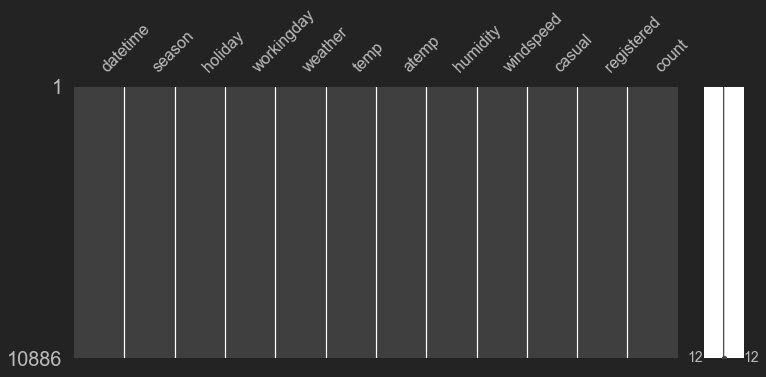

In [17]:
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [18]:
train.datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
5       2011-01-01 05:00:00
6       2011-01-01 06:00:00
7       2011-01-01 07:00:00
8       2011-01-01 08:00:00
9       2011-01-01 09:00:00
10      2011-01-01 10:00:00
11      2011-01-01 11:00:00
12      2011-01-01 12:00:00
13      2011-01-01 13:00:00
14      2011-01-01 14:00:00
15      2011-01-01 15:00:00
16      2011-01-01 16:00:00
17      2011-01-01 17:00:00
18      2011-01-01 18:00:00
19      2011-01-01 19:00:00
20      2011-01-01 20:00:00
21      2011-01-01 21:00:00
22      2011-01-01 22:00:00
23      2011-01-01 23:00:00
24      2011-01-02 00:00:00
25      2011-01-02 01:00:00
26      2011-01-02 02:00:00
27      2011-01-02 03:00:00
28      2011-01-02 04:00:00
29      2011-01-02 06:00:00
                ...        
10856   2012-12-18 18:00:00
10857   2012-12-18 19:00:00
10858   2012-12-18 20:00:00
10859   2012-12-18 21:00:00
10860   2012-12-18 2

In [93]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5,0,0
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,1,10,0,0
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,1,11,0,0
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,1,12,0,0
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,1,13,0,0


[Text(0.5, 1.0, '시간별 대여량')]

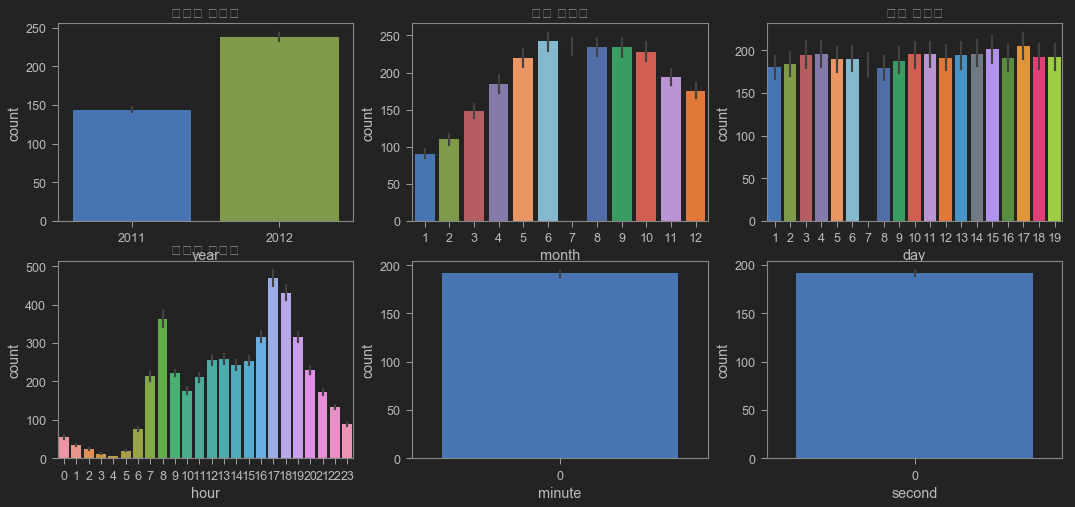

In [20]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,8)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별 대여량")
ax4.set(title="시간별 대여량")


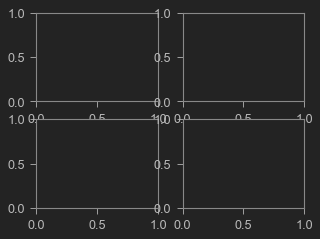

In [21]:
fig, axes=plt.subplots(nrows=2, ncols=2)


In [22]:
train['dayofweek']=train['datetime'].dt.dayofweek
train['dayofweek']
# 0:월요일~6: 일요일

0        5
1        5
2        5
3        5
4        5
5        5
6        5
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21       5
22       5
23       5
24       6
25       6
26       6
27       6
28       6
29       6
        ..
10856    1
10857    1
10858    1
10859    1
10860    1
10861    1
10862    2
10863    2
10864    2
10865    2
10866    2
10867    2
10868    2
10869    2
10870    2
10871    2
10872    2
10873    2
10874    2
10875    2
10876    2
10877    2
10878    2
10879    2
10880    2
10881    2
10882    2
10883    2
10884    2
10885    2
Name: dayofweek, Length: 10886, dtype: int64

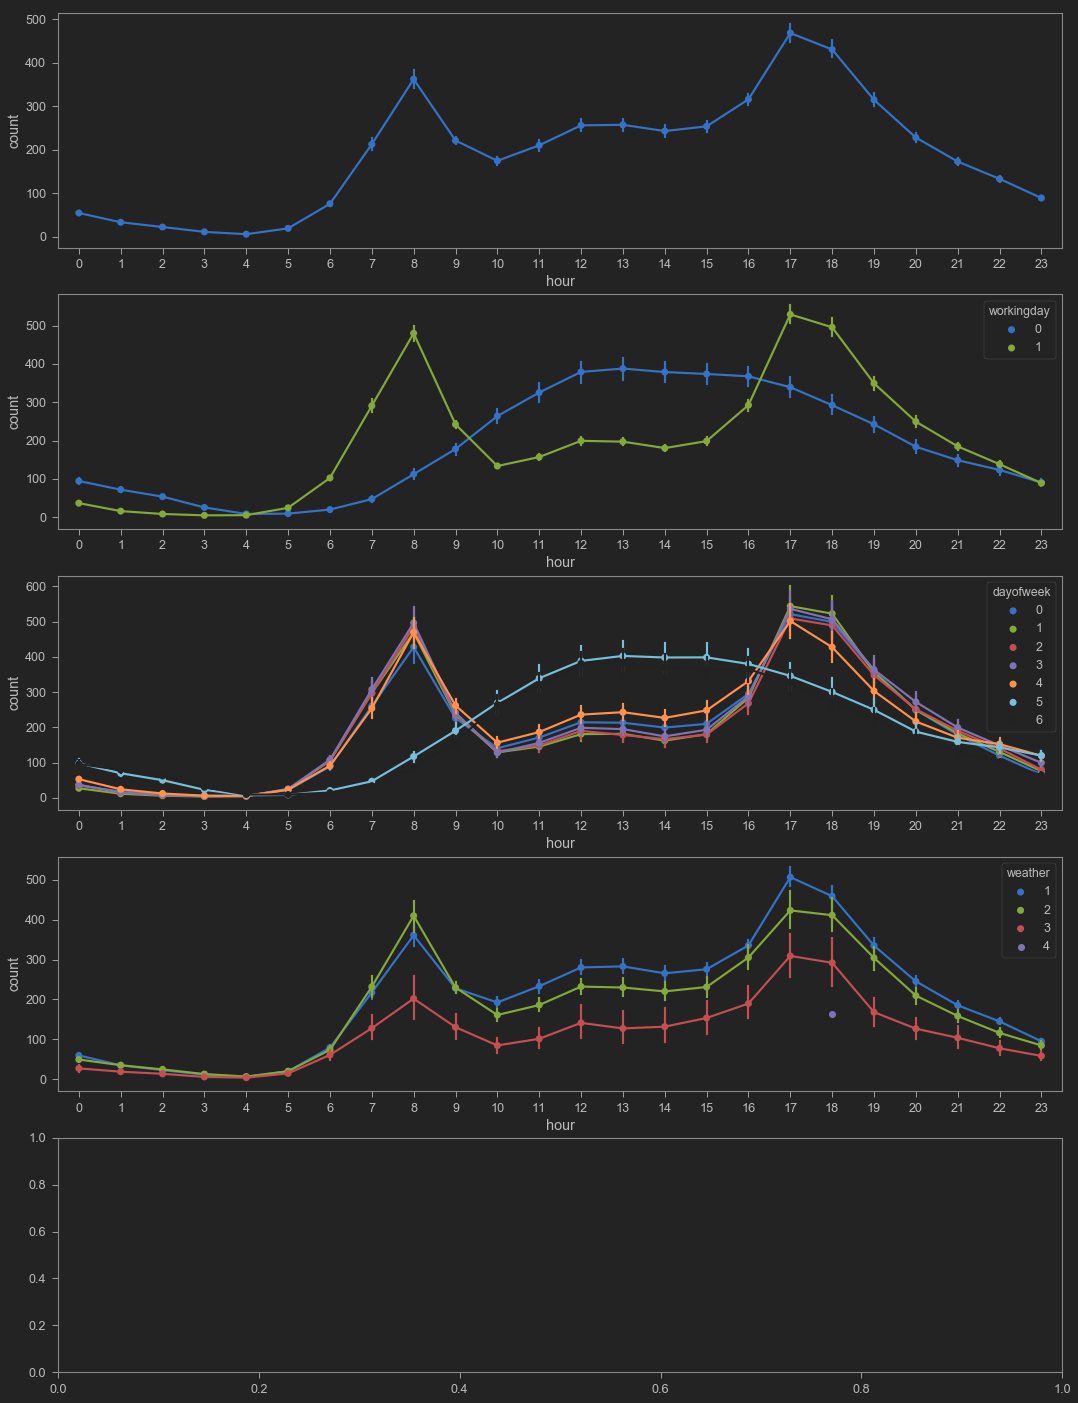

In [23]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x="hour",
             y="count", ax=ax1)

sns.pointplot(data=train, x="hour",
             y="count", hue="workingday",ax=ax2)
sns.pointplot(data=train, x="hour",
             y="count", hue="dayofweek",ax=ax3)
sns.pointplot(data=train, x="hour",
             y="count", hue="weather",ax=ax4)

In [30]:
train.columns
corrMatt=train[['temp',
      'atemp', 'casual','registered','humidity','windspeed','count']]

In [37]:
corrMatt=corrMatt.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False


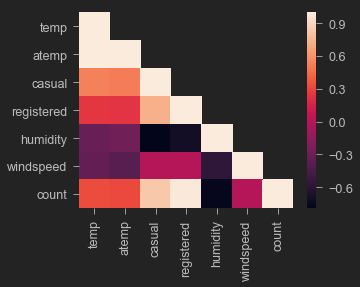

In [43]:
# sns.heatmap(corrMatt, square=True, annot=True)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrMatt, mask= mask)

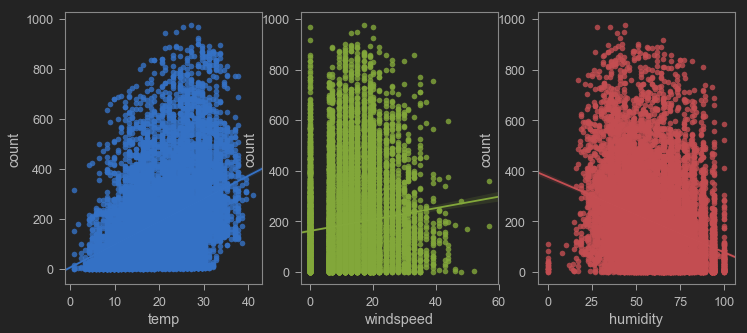

In [40]:
fig, (ax1,ax2,ax3)= plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(data= train, x="temp", y="count", ax=ax1)
sns.regplot(data= train, x='windspeed', y='count',  ax=ax2)
sns.regplot(data= train, x='humidity', y='count', ax=ax3)



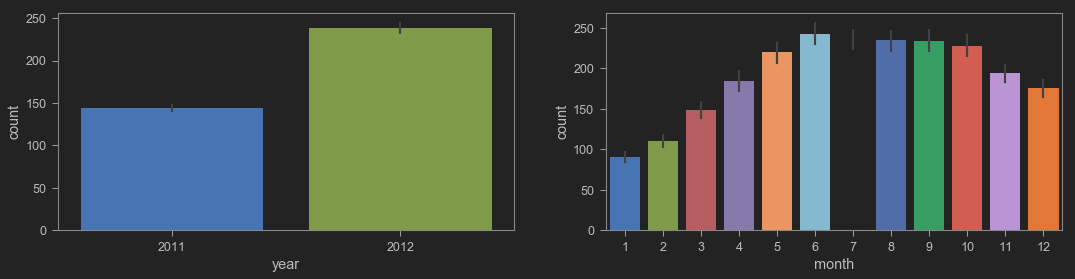

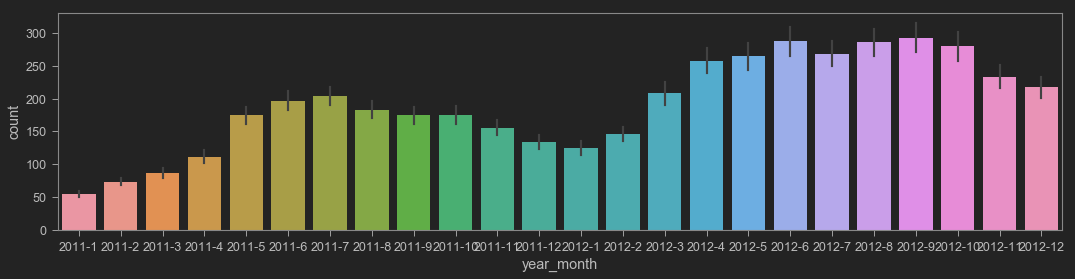

In [48]:
def cym(dtime):
    return "{0}-{1}".format(dtime.year, dtime.month)
train['year_month']=train['datetime'].apply(cym)
train['year_month']   
fig, (ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year', y='count',ax=ax1)
fig, ax3=plt.subplots()
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year_month', y='count',ax=ax3)
sns.barplot(data=train, x='month', y='count',ax=ax2)


In [50]:
test=pd.read_csv("bike-sharing-demand/test.csv", parse_dates=['datetime'])
test.shape

(6493, 9)

In [94]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek
test.shape


(6493, 16)

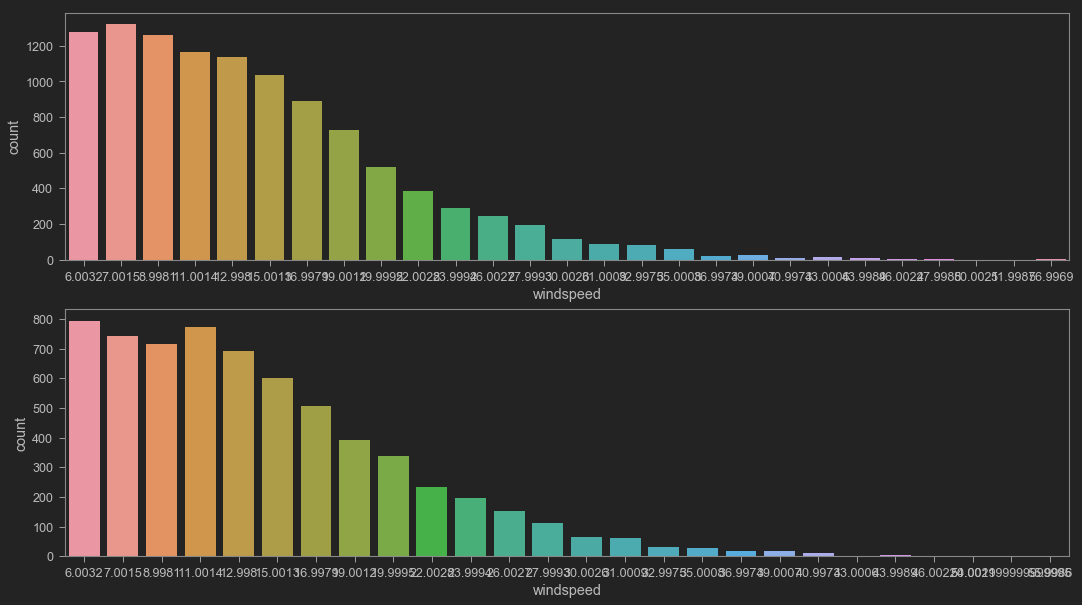

In [91]:
fig,axes=plt.subplots(nrows=2)
fig.set_size_inches(18,10)
sns.countplot(data=train, ax=axes[0], x='windspeed')
sns.countplot(data=test, ax=axes[1], x='windspeed')

In [65]:
# train.loc[train['windspeed']==0, 'windspeed']=train['windspeed'].mean()

# test.loc[train['windspeed']==0, 'windspeed']=test['windspeed'].mean()

trainWin0=train.loc[train['windspeed']==0]
trainWinNot0=train.loc[train['windspeed']!=0]
print(trainWin0.shape)
print(trainWinNot0.shape)

(1313, 20)
(9573, 20)


In [66]:
from sklearn.ensemble import RandomForestClassifier


In [81]:
def predict_windspeed(data):
    dataWind0=data.loc[data['windspeed']==0]
    dataWindNot0=data.loc[data['windspeed']!=0]
    wCol=['season','weather','humidity','month','temp','year','atemp']
    
    dataWindNot0['windspeed']=dataWindNot0['windspeed'].astype('str')
    rfModel_wind=RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[wCol],dataWindNot0['windspeed'])
    
    wind0Values=rfModel_wind.predict(X=dataWind0[wCol])
    predictWind0=dataWind0
    predictWindNot0=dataWindNot0
    
    predictWind0['windspeed']=wind0Values
    data=predictWindNot0.append(predictWind0)
    return data

In [84]:
# train=predict_windspeed(train)
print(train)
test=predict_windspeed(test)
print(test)

                 datetime  season  holiday  workingday  weather   temp  \
5     2011-01-01 05:00:00       1        0           0        2   9.84   
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    2011-01-01 12:00:00       1        0           0        1  17.22   
13    2011-01-01 13:00:00       1        0           0        2  18.86   
14    2011-01-01 14:00:00       1        0           0        2  18.86   
15    2011-01-01 15:00:00       1        0           0        2  18.04   
16    2011-01-01 16:00:00       1        0           0        2  17.22   
17    2011-01-01 17:00:00       1        0           0        2  18.04   
18    2011-01-01 18:00:00       1        0           0        3  17.22   
19    2011-01-01 19:00:00       1        0           0        3  17.22   
20    2011-01-01 20:00:00       1        0           0        2  16.40   
21    2011-01-01 21:00:00       1     

C:\Users\Kyujin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [90]:
train['windspeed']=train['windspeed'].astype('float')
test['windspeed']=test['windspeed'].astype('float')

In [95]:
cfn=['season','holiday','workingday','weather','dayofweek','year','month','hour']
for var in cfn:
    train[var]=train[var].astype('category')
    test[var]=test[var].astype('category')
    

KeyError: 'dayofweek'

In [ ]:
model=RandomForestClassifier(random_state=42, n_jobs=)